# IMPORT PACKAGES

In [46]:
!pip install Sastrawi

In [47]:
# Standard Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Machine Learning Libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix

# NLP Libraries
import nltk
import re
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize

# NLP Libraries - Stemming Bahasa Indonesia - Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Save Model
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# PART 1: DATA

## 1.A) DATA PREPARATION

>### Import Data
- All text dataset are derived from several sources. All of them are Indonesian text. They are later combined into one dataset to provide variation of text that can be learned by machine.
- The sources are as follows:
  1. https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia
  2. https://github.com/indobenchmark/indonlu/tree/master/dataset/smsa_doc-sentiment-prosa
  3. https://github.com/louisowen6/NLP_bahasa_resources
- The type of the text data is varied, such as movie review, tweet about politics, instagram comment and also single words.
- They are labeled into 1 (good), 0 (neutral) and -1 (negative)
- Besides dataset, some dictionaries are also taken from those sources. Some of them are Indonesian slang words and emoji.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
directory = '/content/drive/My Drive/Colab Notebooks/COURSE - PURWADHIKA - Data Science & Machine Learning/Modul_4_Final_Project/Data/'

df_election = pd.read_csv(directory + "dataset_2014_presidential_election.csv", encoding='iso-8859-1')
df_ecommerce = pd.read_csv(directory + 'dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
df_ig_comment = pd.read_csv(directory + "dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
df_tv_review = pd.read_csv(directory + "dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
df_cell_provider_review = pd.read_csv(directory + 'dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
df_movie_review = pd.read_csv(directory + "dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
df_dki_election = pd.read_csv(directory + "dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
df_emoji = pd.read_csv(directory + "dataset_master_emoji.csv", encoding='utf-8')
df_positive_negative_words_1 = pd.read_csv(directory + "data_positive_negative_words_1.csv", encoding='utf-8')
df_positive_negative_words_2 = pd.read_csv(directory + "data_positive_negative_words_2.csv", encoding='utf-8')
df_indonlu_train = pd.read_csv(directory + "dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
df_indonlu_valid = pd.read_csv(directory + "dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])

# df_election = pd.read_csv("Data/dataset_2014_presidential_election.csv", encoding='iso-8859-1')
# df_ecommerce = pd.read_csv('Data/dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
# df_ig_comment = pd.read_csv("Data/dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
# df_tv_review = pd.read_csv("Data/dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
# df_cell_provider_review = pd.read_csv('Data/dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
# df_movie_review = pd.read_csv("Data/dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
# df_dki_election = pd.read_csv("Data/dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
# df_emoji = pd.read_csv("Data/dataset_master_emoji.csv", encoding='utf-8')
# df_positive_negative_words_1 = pd.read_csv("Data/dataset_positive_negative_words_1.csv", encoding='utf-8')
# df_positive_negative_words_2 = pd.read_csv("Data/dataset_positive_negative_words_2.csv", encoding='utf-8')
# df_indonlu_train = pd.read_csv("Data/dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
# df_indonlu_valid = pd.read_csv("Data/dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])

>### Sample of Each Dataset
- here we can look at the type of each dataset

In [6]:
# df_election
print('df_election')
display(df_election.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())

print('\ndf_tv_review')
display(df_tv_review.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())

print('\ndf_movie_review')
display(df_movie_review.head())

print('\ndf_dki_election')
display(df_dki_election.head())

print('\ndf_emoji')
display(df_emoji.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())

print('\ndf_indonlu_train')
display(df_indonlu_train.head())

print('\ndf_indonlu_valid')
display(df_indonlu_valid.head())

df_election


ID        Tweet_ID  ...                   Lokasi User Sentimen
0   133343972    patih_patria  ...            BLITAR - INDONESIA        1
1   921720487  RintisBautista  ...  Didalam hatinya recha  :love        1
2 -2120434840      JokowiPres  ...                           NaN        1
3  -116006035      Franliiiii  ...                        Manado        1
4  -906300614      JokowiPres  ...                           NaN        1

[5 rows x 8 columns]


df_ecommerce


review  sentiment nan1 nan2  nan3
0  @firstlogistics_ @bliblidotcom @bliblicare @yl...         -1  NaN  NaN   NaN
1  @bliblidotcom @bliblicare tidak ada link yg pa...         -1  NaN  NaN   NaN
2  @bliblidotcom min ga relavan twittnya, sekaran...         -1  NaN  NaN   NaN
3  @bcaklikpay @ferdian08 @bliblidotcom jawaban p...         -1  NaN  NaN   NaN
4  waah harus hati2 nih.. kl yg ga teliti bs ke p...         -1  NaN  NaN   NaN


df_ig_comment


Id Sentiment                             Instagram Comment Text
0   1  negative   <USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1   2  negative  Geblek lo tata...cowo bgt dibela2in balikan......
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...
3   4  negative  Intinya kalau kesel dengan ATT nya, gausah ke ...
4   5  negative  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...


df_tv_review


Id  ...                                         Text Tweet
0   1  ...  Undang @N_ShaniJKT48 ke hitamputih, pemenang S...
1   2  ...  Selamat berbuka puasa Semoga amal ibadah hari ...
2   3  ...  Ada nih di trans7 hitam putih, dia dpt penghar...
3   4  ...        selamat ya mas @adietaufan masuk hitamputih
4   5  ...                  Asiknya nonton Hitam Putih Trans7

[5 rows x 5 columns]


df_cell_provider_review


Id Sentiment                                         Text Tweet
0   1  positive  <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1   2  positive  Saktinya balik lagi, alhamdulillah :v <PROVIDE...
2   3  negative  Selamat pagi <PROVIDER_NAME>  bisa bantu kenap...
3   4  negative  Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4   5  negative            Selamat malam PENDUSTA <PROVIDER_NAME>


df_movie_review


Id Sentiment                                         Text Tweet
0   1  negative  Jelek filmnya... apalagi si ernest gak mutu bg...
1   2  negative  Film king Arthur ini film paling jelek dari se...
2   3  negative  @beexkuanlin Sepanjang film gwa berkata kasar ...
3   4  negative  Ane ga suka fast and furious..menurutku kok je...
4   5  negative  @baekhyun36 kan gua ga tau film nya, lu bilang...


df_dki_election


Id  ...                                         Text Tweet
0   1  ...  Banyak akun kloning seolah2 pendukung #agussil...
1   2  ...  #agussilvy bicara apa kasihan yaa...lap itu ai...
2   3  ...  Kalau aku sih gak nunggu hasil akhir QC tp lag...
3   4  ...  Kasian oh kasian dengan peluru 1milyar untuk t...
4   5  ...  Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...

[5 rows x 4 columns]


df_emoji


ID Emoji  ...                 Makna Emoji                     Special Tag
0   1     üòõ  ...  Face With Stuck-Out Tongue   <FACE WITH STUCK-OUT TOUNGES>
1   2     üò†  ...                  Angry Face                    <Angry Face>
2   3     üí£  ...                        Bomb                          <Bomb>
3   4     üíî  ...                Broken Heart                  <Broken Heart>
4   5     üòï  ...               Confused Face                 <Confused Face>

[5 rows x 5 columns]


df_positive_negative_words_1


xx  xx.1    Isi_Tweet  xx.2  ...      Source       Topic Sentimen xx.4
0  NaN   NaN  inkonsisten   NaN  ...  dictionary  vocabulary     -1.0  NaN
1  NaN   NaN        porno   NaN  ...  dictionary  vocabulary     -1.0  NaN
2  NaN   NaN      teroris   NaN  ...  dictionary  vocabulary     -1.0  NaN
3  NaN   NaN        sesat   NaN  ...  dictionary  vocabulary     -1.0  NaN
4  NaN   NaN       tuntut   NaN  ...  dictionary  vocabulary     -1.0  NaN

[5 rows x 10 columns]


df_positive_negative_words_2


term Sentimen
0       diakui  positif
1  penghargaan  positif
2   kecerdasan  positif
3    kekaguman  positif
4    mengagumi  positif


df_indonlu_train


text sentiment
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2  lokasi strategis di jalan sumatera bandung . t...  positive
3  betapa bahagia nya diri ini saat unboxing pake...  positive
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative


df_indonlu_valid


text sentiment
0  meski masa kampanye sudah selesai , bukan bera...   neutral
1                                         tidak enak  negative
2  restoran ini menawarkan makanan sunda . kami m...  positive
3  lokasi di alun alun masakan padang ini cukup t...  positive
4  betapa bejad kader gerindra yang anggota dprd ...  negative

>### Sentiment Distribution Plot of Each Dataset

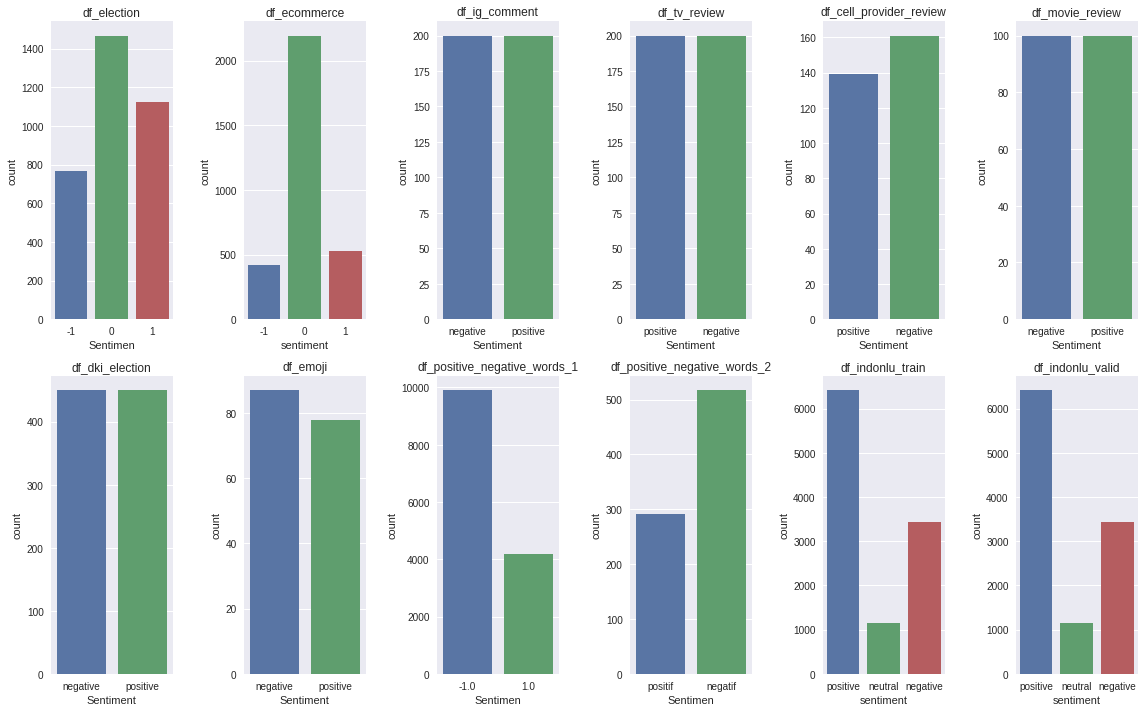

In [7]:
# 251 -> 2 rows, 5 columns, index n

plt.style.use('seaborn')
plt.figure(figsize=(16,10))
ax = plt.axes()

plt.subplot(261)
sns.countplot(x=df_election.Sentimen)
plt.title('df_election')

plt.subplot(262)
sns.countplot(x=df_ecommerce.sentiment)
plt.title('df_ecommerce')

plt.subplot(263)
sns.countplot(x=df_ig_comment.Sentiment)
plt.title('df_ig_comment')

plt.subplot(264)
sns.countplot(x=df_tv_review.Sentiment)
plt.title('df_tv_review')

plt.subplot(265)
sns.countplot(x=df_cell_provider_review.Sentiment)
plt.title('df_cell_provider_review')

plt.subplot(266)
sns.countplot(x=df_movie_review.Sentiment)
plt.title('df_movie_review')

plt.subplot(267)
sns.countplot(x=df_dki_election.Sentiment)
plt.title('df_dki_election')

plt.subplot(268)
sns.countplot(x=df_emoji.Sentiment)
plt.title('df_emoji')

plt.subplot(269)
sns.countplot(x=df_positive_negative_words_1.Sentimen)
plt.title('df_positive_negative_words_1')

plt.subplot(2,6,10)
sns.countplot(x=df_positive_negative_words_2.Sentimen)
plt.title('df_positive_negative_words_2')

plt.subplot(2,6,11)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_train')

plt.subplot(2,6,12)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_valid')

plt.tight_layout()
plt.show()

- There are total 12 datasets.
- Plot above describe the distribution of the sentiment
- At glance, it seems that the frequency of neutral sentiments are lesser than others
- We will see this in detail in the next part

## 1.B) Data Format Preparation
In this step, we will try to combine all the datasets into one dataset

>#### Dataframe Modification
There are some steps that will be done as follows:
- drop unused features/columns. We will only focus on columns that contain text and sentiment label
- convert Sentiment Label in text into nominal category (1, 0, -1)
- shifting the columns position so the each data have the same columns order.

In [50]:
df_election_m = df_election.drop(columns = ['ID', 'Tweet_ID', 'Tanggal_Tweet', 'Kandidat', 'Aplikasi', 'Lokasi User'])
df_ecommerce_m = df_ecommerce.drop(columns = ['nan1', 'nan2', 'nan3'])


# categorical label encoding & feature position shift
sentiment_label_conversion_Sentiment = {"Sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_sentiment = {"sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_Sentimen = {"Sentimen": {'positif': 1, 'netral': 0, 'negatif': -1}}
sentiment_label_conversion_float_to_integer = {"Sentimen": {1.0: 1, 0.0: 0, -1.0: -1}}


df_ig_comment_m = df_ig_comment.drop(columns='Id') # drop unused columns
df_ig_comment_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_ig_comment_m = df_ig_comment_m.reindex(columns=['Instagram Comment Text', 'Sentiment']) # reorder the columns

df_tv_review_m = df_tv_review.drop(columns=['Id', 'Acara TV', 'Jumlah Retweet']) # drop unused columns
df_tv_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_tv_review_m = df_tv_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_cell_provider_review_m = df_cell_provider_review.drop(columns='Id') # drop unused columns
df_cell_provider_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_cell_provider_review_m = df_cell_provider_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_movie_review_m = df_movie_review.drop(columns='Id') # drop unused columns
df_movie_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_movie_review_m = df_movie_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_dki_election_m = df_dki_election.drop(columns=['Id', 'Pasangan Calon']) # drop unused columns
df_dki_election_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_dki_election_m = df_dki_election_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

def emoji_description_joiner(text):
    text_split = text.split(' ')
    text_join = "_".join(text_split)
    return text_join 

df_emoji_m = df_emoji.drop(columns=['ID', 'Emoji', 'Special Tag']) # drop unused columns
df_emoji_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_emoji_m = df_emoji_m.reindex(columns=['Makna Emoji', 'Sentiment']) # reorder the columns
df_emoji_m['Makna Emoji'] = df_emoji_m['Makna Emoji'].apply(lambda x: emoji_description_joiner(x))

df_positive_negative_words_1_m = df_positive_negative_words_1.drop(columns=['xx', 'xx.1', 'xx.2', 'xx.3', 'xx xx', 'Source', 'Topic', 'xx.4']) # drop unused columns
df_positive_negative_words_1_m.replace(sentiment_label_conversion_float_to_integer) # convert categorical sentiment label to numeric label
df_positive_negative_words_1_m['Sentimen'] = df_positive_negative_words_1_m['Sentimen'].fillna(0.0).astype(int)

df_positive_negative_words_2_m = df_positive_negative_words_2.replace(sentiment_label_conversion_Sentimen) # convert categorical sentiment label to numeric label
# df_positive_negative_words_1.Sentimen.isna().value_counts()

df_indonlu_train_m = df_indonlu_train.copy()
df_indonlu_train_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label

df_indonlu_valid_m = df_indonlu_valid.copy()
df_indonlu_valid_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label


In [51]:
# df_election
print('df_election')
display(df_election.head())
display(df_election_m.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())
display(df_ecommerce_m.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())
display(df_ig_comment_m.head())

print('\ndf_tv_review')
display(df_tv_review.head())
display(df_tv_review_m.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())
display(df_cell_provider_review_m.head())

print('\ndf_movie_review')
display(df_movie_review.head())
display(df_movie_review_m.head())

print('\ndf_dki_election')
display(df_dki_election.head())
display(df_dki_election_m.head())

print('\ndf_emoji')
display(df_emoji.head())
display(df_emoji_m.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())
display(df_positive_negative_words_1_m.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())
display(df_positive_negative_words_2_m.head())

df_election


ID        Tweet_ID  ...                   Lokasi User Sentimen
0   133343972    patih_patria  ...            BLITAR - INDONESIA        1
1   921720487  RintisBautista  ...  Didalam hatinya recha  :love        1
2 -2120434840      JokowiPres  ...                           NaN        1
3  -116006035      Franliiiii  ...                        Manado        1
4  -906300614      JokowiPres  ...                           NaN        1

[5 rows x 8 columns]

Isi_Tweet  Sentimen
0                                                                     @FahrelStv Gak setuju Jokowi jadi Cawapres.. CAPRES JOKOWI harga mati...         1
1                                                            capres jokowi,wacapres abraham samad. gubernur ahok. gua yakin koruptor abissss !         1
2                                        RT @RintisBautista: capres jokowi,wacapres abraham samad. gubernur ahok. gua yakin koruptor abissss !         1
3                  capres ( Prabowo ) and cawapres ( jokowi ) and gubDKI (Ahok) mantap lanjutkan !!! buat pak presiden (SBY) bubarkan saja FPI         1
4  RT @Franliiiii: capres ( Prabowo ) and cawapres ( jokowi ) and gubDKI (Ahok) mantap lanjutkan !!! buat pak presiden (SBY) bubarkan saja FPI         1


df_ecommerce


review  ...  nan3
0                  @firstlogistics_ @bliblidotcom @bliblicare @ylki_id rasanya kecewa bgt sm jasa logistik satu ini, gak ada niat baik.   ...   NaN
1  @bliblidotcom @bliblicare tidak ada link yg pasti produknya speaker niko harga 160rbuan kirim ke manyar gresik masa kena ongkir 90rb   ...   NaN
2                       @bliblidotcom min ga relavan twittnya, sekarang kan tanggal 19 april .. berarti ini twit dari masa lalu ya min?   ...   NaN
3   @bcaklikpay @ferdian08 @bliblidotcom jawaban pun klise, besok dicoba lagi bla bla bla.. klikpay emg ga pnh belajar dr pglmn kmrn2..   ...   NaN
4                          waah harus hati2 nih.. kl yg ga teliti bs ke potong harga normal.. parah jg ya @bcaklikpay dan @bliblidotcom   ...   NaN

[5 rows x 5 columns]

review  sentiment
0                  @firstlogistics_ @bliblidotcom @bliblicare @ylki_id rasanya kecewa bgt sm jasa logistik satu ini, gak ada niat baik.          -1
1  @bliblidotcom @bliblicare tidak ada link yg pasti produknya speaker niko harga 160rbuan kirim ke manyar gresik masa kena ongkir 90rb          -1
2                       @bliblidotcom min ga relavan twittnya, sekarang kan tanggal 19 april .. berarti ini twit dari masa lalu ya min?          -1
3   @bcaklikpay @ferdian08 @bliblidotcom jawaban pun klise, besok dicoba lagi bla bla bla.. klikpay emg ga pnh belajar dr pglmn kmrn2..          -1
4                          waah harus hati2 nih.. kl yg ga teliti bs ke potong harga normal.. parah jg ya @bcaklikpay dan @bliblidotcom          -1


df_ig_comment


Id  ...                                                                                                                                                                                                                                                                                                                                                             Instagram Comment Text
0   1  ...                                                                                                                                                                 <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!
1   2  ...                                                                                                                                                                                                                                                               Geblek lo tata...cowo bgt dibela2in balikan...hadeww...ntar ditinggal lg nyalahin tuh cowo...padahal kitenya yg oon.
2   3  ...                                                                                                                                                                                                                                       Kmrn termewek2 skr lengket lg duhhh kok labil bgt sih mbak kya abege ajah ato yg kmrn cari sensasi biar top markotoppp ertong gk berkualitas
3   4  ...  Intinya kalau kesel dengan ATT nya, gausah ke anaknya juga. Kasian buat perkembangan psikis anak kedepannya. Itu orang bener bener tolol, skrg seandainya dia punya anak, terus anaknya dikatain sama orang yang benci sama dia, gimana perasaan dia ? Benci sama seseorang boleh, tapi harus tau batesnya ?? toh namanya manusia, gaakan semua jadi penyuka, pasti ada haters ??
4   5  ...                                                                                                                                                                                                                                                        hadewwwww permpuan itu lg!!!!sakit jiwa,knp harus dia yg jd peran utama di film hantu jeruk purut,ky khabisan stok Artis ja

[5 rows x 3 columns]

Instagram Comment Text  Sentiment
0                                                                                                                                                                 <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!         -1
1                                                                                                                                                                                                                                                               Geblek lo tata...cowo bgt dibela2in balikan...hadeww...ntar ditinggal lg nyalahin tuh cowo...padahal kitenya yg oon.         -1
2                                                                                                                                                                                                                                       Kmrn termewek2 skr lengket lg duhhh kok labil bgt sih mbak kya abege ajah ato yg kmrn cari sensasi biar top markotoppp ertong gk berkualitas         -1
3  Intinya kalau kesel dengan ATT nya, gausah ke anaknya juga. Kasian buat perkembangan psikis anak kedepannya. Itu orang bener bener tolol, skrg seandainya dia punya anak, terus anaknya dikatain sama orang yang benci sama dia, gimana perasaan dia ? Benci sama seseorang boleh, tapi harus tau batesnya ?? toh namanya manusia, gaakan semua jadi penyuka, pasti ada haters ??         -1
4                                                                                                                                                                                                                                                        hadewwwww permpuan itu lg!!!!sakit jiwa,knp harus dia yg jd peran utama di film hantu jeruk purut,ky khabisan stok Artis ja         -1


df_tv_review


Id  ...                                                                                                           Text Tweet
0   1  ...  Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya
1   2  ...                                          Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih
2   3  ...                                      Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih
3   4  ...                                                                          selamat ya mas @adietaufan masuk hitamputih
4   5  ...                                                                                    Asiknya nonton Hitam Putih Trans7

[5 rows x 5 columns]

Text Tweet  Sentiment
0  Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya          1
1                                          Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih          1
2                                      Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih          1
3                                                                          selamat ya mas @adietaufan masuk hitamputih          1
4                                                                                    Asiknya nonton Hitam Putih Trans7          1


df_cell_provider_review


Id  ...                                                                                                                 Text Tweet
0   1  ...                                       <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>
1   2  ...                                                                      Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>
2   3  ...  Selamat pagi <PROVIDER_NAME>  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  <URL>
3   4  ...                                                 Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!
4   5  ...                                                                                    Selamat malam PENDUSTA <PROVIDER_NAME> 

[5 rows x 3 columns]

Text Tweet  Sentiment
0                                       <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>          1
1                                                                      Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>          1
2  Selamat pagi <PROVIDER_NAME>  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  <URL>         -1
3                                                 Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!         -1
4                                                                                    Selamat malam PENDUSTA <PROVIDER_NAME>          -1


df_movie_review


Id  ...                                                                                                     Text Tweet
0   1  ...                                       Jelek filmnya... apalagi si ernest gak mutu bgt actingnya... film sampah
1   2  ...                                        Film king Arthur ini film paling jelek dari seluruh cerita King Arthur 
2   3  ...                                              @beexkuanlin Sepanjang film gwa berkata kasar terus pada bapaknya
3   4  ...                                                   Ane ga suka fast and furious..menurutku kok jelek ya tu film
4   5  ...  @baekhyun36 kan gua ga tau film nya, lu bilang perang perangan/? Perang"an disebut ama rp yaoi jadi ambigu :v

[5 rows x 3 columns]

Text Tweet  Sentiment
0                                       Jelek filmnya... apalagi si ernest gak mutu bgt actingnya... film sampah         -1
1                                        Film king Arthur ini film paling jelek dari seluruh cerita King Arthur          -1
2                                              @beexkuanlin Sepanjang film gwa berkata kasar terus pada bapaknya         -1
3                                                   Ane ga suka fast and furious..menurutku kok jelek ya tu film         -1
4  @baekhyun36 kan gua ga tau film nya, lu bilang perang perangan/? Perang"an disebut ama rp yaoi jadi ambigu :v         -1


df_dki_election


Id  ...                                                                                                                               Text Tweet
0   1  ...  Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh
1   2  ...                                                                         #agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk
2   3  ...             Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..
3   4  ...           Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017
4   5  ...                                              Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa

[5 rows x 4 columns]

Text Tweet  Sentiment
0  Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh         -1
1                                                                         #agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk         -1
2             Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..         -1
3           Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017         -1
4                                              Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa         -1


df_emoji


ID Emoji  ...                 Makna Emoji                     Special Tag
0   1     üòõ  ...  Face With Stuck-Out Tongue   <FACE WITH STUCK-OUT TOUNGES>
1   2     üò†  ...                  Angry Face                    <Angry Face>
2   3     üí£  ...                        Bomb                          <Bomb>
3   4     üíî  ...                Broken Heart                  <Broken Heart>
4   5     üòï  ...               Confused Face                 <Confused Face>

[5 rows x 5 columns]

Makna Emoji  Sentiment
0  Face_With_Stuck-Out_Tongue         -1
1                  Angry_Face         -1
2                        Bomb         -1
3                Broken_Heart         -1
4               Confused_Face         -1


df_positive_negative_words_1


xx  xx.1    Isi_Tweet  xx.2  ...      Source       Topic Sentimen xx.4
0  NaN   NaN  inkonsisten   NaN  ...  dictionary  vocabulary     -1.0  NaN
1  NaN   NaN        porno   NaN  ...  dictionary  vocabulary     -1.0  NaN
2  NaN   NaN      teroris   NaN  ...  dictionary  vocabulary     -1.0  NaN
3  NaN   NaN        sesat   NaN  ...  dictionary  vocabulary     -1.0  NaN
4  NaN   NaN       tuntut   NaN  ...  dictionary  vocabulary     -1.0  NaN

[5 rows x 10 columns]

Isi_Tweet  Sentimen
0  inkonsisten        -1
1        porno        -1
2      teroris        -1
3        sesat        -1
4       tuntut        -1


df_positive_negative_words_2


term Sentimen
0       diakui  positif
1  penghargaan  positif
2   kecerdasan  positif
3    kekaguman  positif
4    mengagumi  positif

term  Sentimen
0       diakui         1
1  penghargaan         1
2   kecerdasan         1
3    kekaguman         1
4    mengagumi         1

>#### Combining All Dataframe
- Each datasets above has already had the same columns order that are basically preceded by columns containing text and followed by columns containing sentiment
- Here, we will change each column name to have the same pattern, i.e. "text" and "sentiment" and then combine all of them into one dataframe

In [52]:
# LIST OF MODIFIED DFs before column name change
# df_election_m.head()
# df_ecommerce_m.head()
# df_ig_comment_m.head()
# df_tv_review_m.head()
# df_cell_provider_review_m.head()
# df_movie_review_m.head()
# df_dki_election_m.head()
# df_emoji_m.head()
# df_positive_negative_words_1_m.head()
# df_positive_negative_words_2_m.head()

dataframes = [df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
for i in dataframes:
  print(i.columns)

Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['review', 'sentiment'], dtype='object')
Index(['Instagram Comment Text', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Makna Emoji', 'Sentiment'], dtype='object')
Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['term', 'Sentimen'], dtype='object')


In [53]:
# change the column names
dataframes = [df_indonlu_train_m, df_indonlu_valid_m, df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
# len(dataframes)
for i in dataframes:
  i.columns = ['text', 'sentiment']

In [55]:
# LIST OF MODIFIED DFs after column name change
for i in dataframes:
  print(i.columns)

Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')


In [56]:
df = pd.concat(dataframes, ignore_index=True)

In [58]:
print(len(df))
display(df.sample(10))
df.sentiment.value_counts().iloc[:]

36034


text  sentiment
15936                                                                      holisyit! how come a same product has a significant price difference on different e-store. @lazadaid and @tokopedia url          -1
3932   makanan nya variatif sekali . enak dan kualitas nya sangat bagus . suka banget sama bubur ayam dan panganan tradisional nya . tempat nya juga menyenangkan , semi di luar jadi terasa lega .          1
6651                                                                                                                 soal usung achmad - eddy tanjung , jubir demokrat riau : belum ada kesepakatan          0
26345                                                                                                                                                                                     keborosan         -1
31612                                                                                                                                                                                      bonafide          1
12059                                                        aku pernah mencoba indihome tetapi bukan beda tempat sama rumah ku yang sekarang tetapi sinyal jelek terus harga nya lumayan mahal kan         -1
20203                                                                                                                                  Ayo pendukung AHY Dukung penggembosmu <Tongue> <Fire> <Fire>         -1
1781                                                                                                                                                                                     nilai plus          1
12758                                                  bpk @jr_saragih yg sy hormati. bukti sy ini.yg diberikan kpd bapak presiden soeharto pd tahun 1984 & ibu wakil presiden megawati pd thn 2000          1
12647                                                                             RT @megaretya: slh 1 capres ARB kn mertua-ku hahakakbs diatur @farinahasyim @fameiyoga @haddasahajeng @megayamega          1

-1    16638
 1    14454
 0     4942
Name: sentiment, dtype: int64

- Now we have one dataset that contains 36,034 data
- In the next part, we will check whether there are empty data or duplicate data to make sure that our machine learning model will learn cleaned data

## 1.C) Handle Empty & Duplicate Data

>#### Drop Empty Data

In [59]:
df[df.text.isna()]

text  sentiment
23234  NaN          0
26911  NaN          0

In [60]:
df.dropna(inplace=True)

In [61]:
df[df.text.isna()]

Empty DataFrame
Columns: [text, sentiment]
Index: []

>#### Drop Duplicate Data

In [62]:
print('before drop duplicates')
print("total data:", len(df))
print("unique data:", df.text.nunique())

before drop duplicates
total data: 36032
unique data: 27617


In [63]:
df.drop_duplicates(['text'], inplace=True)
print('after drop duplicates')
print("total data:", len(df))
print("unique data:", df.text.nunique())

after drop duplicates
total data: 27617
unique data: 27617


- After checking, first we found there are two empty data. We drop it with `dropna()`
- Then, we also found that there many duplicate data. So we just use `drop_duplicates` in order to have only unique data
- Finally, we now have 27,617 data (previously 36,032). There are about 9000s data that are duplicate
- Now, the data is ready to be passed on to Text Preprocessing step

## 1.D) Text Preprocessing - EDA Purpose
In this step we basically want to clean the data from any word/character that sometimes doesn't have significant meaning for the context. 

It is an important step to make sure the machine learning learn the most meaningful words or characters in defining to what sentiment they are classified.
The steps are consisted of the following 8 ones, as follows:

- Step 1
    1. converting to lower case
    1. remove or convert number into text
    1. remove punctuation
    1. remove white spaces
    1. converting slang words to standard words
    1. converting emoji to emoji description
    1. remove stopwords and particular words 
- Step 2
    8. stemming (Indonesian affixation system)

In [64]:
# the element on the dictionary has been curated as follows:
# - taking out the negation in stopwords, such as "tidak", "bukan", "belum", "jangan", and their variations
# - slang words sudah ditambahkan

# stopwords
STOPWORDS = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'yg', 'jd', 'nya', 'sih', 'url']

# emoji converter
emoji_dictionary = {'üòõ': 'Face_With_Stuck-Out_Tongue', 'üò†': 'Angry_Face', 'üí£': 'Bomb', 'üíî': 'Broken_Heart', 'üòï': 'Confused_Face', 'üòû': 'Disappointed_Face', 'üòë': 'Expressionless_Face', 'üòã': 'Face_Savouring_Delicious_Food', 'üò±': 'Face_Screaming_in_Fear', 'üòì': 'Face_With_Cold_Sweat', 'üòÆ': 'Face_With_Open_Mouth', 'üò§': 'Face_With_Steam_From_Nose', 'üòù': 'Face_With_Stuck-Out_Tongue_&_Closed_Eyes', 'üò∂': 'Face_Without_Mouth', 'üî•': 'Fire', '‚òπ': 'Frowning_Face', 'üò¨': 'Grimacing_Face', '‚ö°': 'High_Voltage', 'ü§•': 'Lying_Face', 'üò£': 'Persevering_Face', 'üôá': 'Person_Bowing', 'üèÉ': 'Person_Running', 'üêΩ': 'Pig_Nose', 'üò°': 'Pouting_Face', 'üôà': 'See-No-Evil_Monkey', 'üôÅ': 'Slightly_Frowning_Face', 'üôä': 'Speak-No-Evil_Monkey', 'ü§î': 'Thinking_Face', 'üëé': 'Thumbs_Down', 'üëÖ': 'Tongue', 'üò©': 'Weary_Face', 'ü§ê': 'Zipper-Mouth_Face', 'üòê': 'Neutral_Face', 'üôÑ': 'Face_With_Rolling_Eyes', 'üòè': 'Smirking_Face', 'üò•': 'Disappointed_but_Relieved_Face', 'üòØ': 'Hushed_Face', 'üò™': 'Sleepy_Face', 'üò´': 'Tired_Face', 'üò¥': 'Sleeping_Face', 'üòå': 'Relieved_Face', 'üòú': 'Face_With_Stuck-Out_Tongue_&_Winking_EyeNegatif', 'ü§§': 'Drooling_Face', 'üòí': 'Unamused_Face', 'üòî': 'Pensive_Face', 'üôÉ': 'Upside-Down_Face', 'ü§ë': 'Money-Mouth_Face', 'üò≤': 'Astonished_Face', 'üòñ': 'Confounded_Face', 'üòü': 'Worried_Face', 'üò¢': 'Crying_Face', 'üò≠': 'Loudly_Crying_Face', 'üò¶': 'Frowning_Face_With_Open_Mouth', 'üòß': 'Anguished_Face', 'üò®': 'Fearful_Face', 'üò∞': 'Face_With_Open_Mouth_&_Cold_Sweat', 'üò≥': 'Flushed_Face', 'üòµ': 'Dizzy_Face', 'üò∑': 'Face_With_Medical_Mask', 'ü§í': 'Face_With_Thermometer', 'ü§ï': 'Face_With_Head-Bandage', 'ü§¢': 'Nauseated_Face', 'ü§ß': 'Sneezing_Face', 'ü§ì': 'Nerd_Face', 'üòà': 'Smiling_Face_With_Horns', 'üëø': 'Angry_Face_With_Horns', 'üëπ': 'Ogre', 'üë∫': 'Goblin', 'üíÄ': 'Skull', '‚ò†': 'Skull_and_Crossbones', 'üëª': 'Ghost', 'üí©': 'Pile_of_Poo', 'üôÄ': 'Weary_Cat_Face', 'üòø': 'Crying_Cat_Face', 'üòæ': 'Pouting_Cat_Face', 'üôâ': 'Hear-No-Evil_Monkey', 'üôé': 'Person_Pouting', 'üôÖ': 'Person_Gesturing_No', 'üíÅ': 'Person_Tipping_Hand', 'ü§¶': 'Person_Facepalming', 'ü§∑': 'Person_Shrugging', 'ü§û': 'Crossed_Fingers', 'üìâ': 'Chart_Decreasing', '‚õî': 'No_Entry', '‚úñ': 'Heavy_Multiplication_X', '‚ùå': 'Cross_Mark', '‚ùé': 'Cross_Mark_Button', 'üëå': 'OK_Hand', 'üëä': 'Oncoming_Fist', 'ü§ò': 'Sign_of_the_Horns', 'üòç': 'Smiling_Face_With_Heart-Eyes', 'üòä': 'Smiling_Face_With_Smiling_Eyes', 'üëç': 'Thumbs_Up', 'üòπ': 'Cat_Face_With_Tears_of_Joy', 'üëè': 'Clapping_Hands', 'üòò': 'Face_Blowing_a_Kiss', 'üòÇ': 'face_with_tears_of_joy', 'üôè': 'Folded_Hands', '‚úä': 'Glory', 'üåü': 'Glowing_Star', 'üòÅ': 'grining_face_with_smile_eye', 'üòÄ': 'grining_face', 'üíò': 'Heart_With_Arrow', '‚úî': 'Heavy_Check_Mark', 'ü§ó': 'Hugging_Face', 'üòö': 'Kissing_Face_With_Closed_Eyes', '‚ù§': 'lovered', 'üôã': 'Person_Raising_Hand', 'üôå': 'Raising_Hands', 'ü§£': 'Rolling_on_the_Floor_Laughing', 'üòÜ': 'Smiling_Face_With_Open_Mouth_&_Closed_Eyes', 'üòÖ': 'Smiling_Face_With_Open_Mouth_&_Cold_Sweat', 'üòÑ': 'Smiling_Face_With_Open_Mouth_&_Smiling_Eyes', 'üòé': 'Smiling_Face_With_Sunglasses', 'üèÜ': 'Trophy', '‚úå': 'Victory_Hand', 'üòÉ': 'Smiling_Face_With_Open_Mouth', 'üòâ': 'Wingking_Face', 'üòó': 'Kissing_Face', 'üòô': 'Kissing_Face_With_Smiling_Eyes', '‚ò∫': 'Smiling_Face', 'üôÇ': 'Slightly_Smiling_Face', 'üòá': 'Smiling_Face_With_Halo', 'ü§†': 'Cowboy_Hat_Face', 'ü§°': 'Clown_Face', 'üò∫': 'Smiling_Cat_Face_With_Open_Mouth', 'üò∏': 'Grinning_Cat_Face_With_Smiling_Eyes', 'üòª': 'Smiling_Cat_Face_With_Heart-Eyes', 'üòº': 'Cat_Face_With_Wry_Smile', 'üòΩ': 'Kissing_Cat_Face_With_Closed_Eyes', '‚úà': 'Plane', 'üëº': 'Baby_Angel', 'üíÜ': 'Person_Getting_Massage', 'üö∂': 'Person_Walking', 'üíÉ': 'Woman_Dancing', 'üë≠': 'Two_Women_Holding_Hands', 'üíè': 'Kiss', 'üíë': 'Couple_With_Heart', 'üí™': 'Flexed_Biceps', 'üñê': 'Raised_Hand_With_Fingers_Splayed', 'ü§ù': 'Handshake', 'üíã': 'Kiss_Mark', 'üíû': 'Revolving_Hearts', 'üíù': 'Heart_With_Ribbon', 'üíé': 'Gem_Stone', 'üê•': 'Front-Facing_Baby_Chick', 'üíê': 'Bouquet', 'üåπ': 'Rose', 'üåõ': 'First_Quarter_Moon_With_Face', 'üåú': 'Last_Quarter_Moon_With_Face', 'üåù': 'Full_Moon_With_Face', 'üåû': 'Sun_With_Face', '‚≠ê': 'White_Medium_Star', 'üåà': 'Rainbow', 'üéÄ': 'Ribbon', 'üéÅ': 'Wrapped_Gift', 'üí°': 'Light_Bulb', 'üìà': 'Chart_Increasing', 'üíØ': 'Hundred_Points', 'üÜó': 'OK_Button'}

# slang words converter
slang_data = {'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bkn': 'bukan','bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blm': 'belum','blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cm': 'cuma', 'cuman': 'cuma', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'conlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dkt': 'dekat', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'ga':'tidak', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak': 'tidak', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'gaje': 'tidak jelas', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'gitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gmn': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpp': 'tidak apa-apa', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gt': 'begitu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbg': 'sebagai', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin'}

In [21]:
# 1) Converting to Lower Case
def to_lower(text):
    return text.lower()

# 2) remove or convert number into text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# 3) remove punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# 4) remove white spaces
def remove_white_space(text):
    return " ".join(text.split())

# 5) converting slang words to standard words
def slang_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(slang_data.keys()):
            text_split[text_split.index(i)] = slang_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 6) converting emoji to description
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_dictionary.keys()):
            text_split[text_split.index(i)] = emoji_dictionary[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 7) remove stopwords and particular words 
def remove_stopwords(sentence):
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in STOPWORDS])

# 8) stemming text
def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [22]:
pd.options.display.max_colwidth = None

# df['text_prep1_to_lower'] = df.text.apply(lambda x: to_lower(x))
# df['text_prep2_remove_numbers'] = df['text_prep1_to_lower'].apply(lambda x: remove_numbers(x))
# df['text_prep3_remove_punct'] = df['text_prep2_remove_numbers'].apply(lambda x: remove_punct(x))
# df['text_prep4_remove_white_space'] = df['text_prep3_remove_punct'].apply(lambda x: remove_white_space(x))
# df['text_prep5_convert_slang_words'] = df['text_prep4_remove_white_space'].apply(lambda x: slang_converter(x))
# df['text_prep6_convert_emoji'] = df['text_prep5_convert_slang_words'].apply(lambda x: emoji_converter(x))
# df['text_prep7_remove_stopwords'] = df['text_prep6_convert_emoji'].apply(lambda x: remove_stopwords(x))
# df['text_prep8_stemmed'] = df.text_prep7_remove_stopwords.apply(lambda x: stem(x))

# display(df.sample(20))
# len(df)

- In this case, text preprocessing is done to Indonesian text data.
- Step point 1 until 4 basically run the standard text cleaning process that exist in all languages, including Indonesian
  1. lowering all letters
  1. removing numbers
  1. removing punctuation
  1. removing white space (non-standard white space such as tab space)
- Step point 5 to 8 are specially designed to handle Indonesian text.
  5. slang words converter
    
    Indonesian people often shorten the standard words or use slang words when texting or posting something in the social media such as `bkn` (bukan), `sm` (sama), `ngebully` (intimadasi), `au ah` (tidak tahu) and the likes. In this step we will replace all the slang and abbreviated words into its standard form
  6. emoji converter

    by using this converter, the idea is to replace all emojis into its description. For example, `üôá` converted into `Person_Bowing` or `üòÆ` converted into `Face_With_Open_Mouth`

  7. stopwords removal
    we use nltk stopwords that is modified by omitting the negation words (`tidak`, `bukan`, `jangan` and `belum`) and adding some other forms found in the data such as `nya` and `yg`)

  8. stemming
    since we are treating Indonesian text, so we will use Sastrawi library for stemming process (Sastrawi only provides stemming). NLTK and other NLP Libraries do not yet have the Indonesian-based stemming.
    
    however, it should be noted that according to **INDIRA SYAWANODYA** in her [Post-Graduate Thesis](https://repository.telkomuniversity.ac.id/pustaka/147378/improvement-of-lemmatization-for-indonesian-text-document-with-spellchecker.html), `Sastrawi's running time is slow and it impacts to its low performance`.

    we will see later that it will impact also to the model performance. We can see this illustration
    - running the stemming process to 27,617 data needs more than 1 hour
    - running hyperparameter tuning to create model for 19,000 training data needs more than 24 hours
    - running the hyperparameter tuning model for 100 new data needs approximately 30 seconds to 1 minute

This is the result of text preprocessing steps

In [66]:
df = pd.read_csv(directory + 'text_preprocessed_27617.csv')
df.sample(5)

text  ...                                                                                text_prep8_stemmed
7978                                                                                                      masakan nya enak , banyak varian nya , lokasi nya dekat dengan terminal bus , sistem nya seperti prasmanan , yang lebih enak nya itu sambal nya yang saya cari , mantaap  ...                 masakan enak varian lokasi terminal bus sistem prasmanan enak sambal cari mantaap
16486                                                                                                                                                  @tokopedia saldo udah kepotong tapi kenapa malah ada tagihan yang sama lagi? pembayaran saya lakuin tadi ga konfirmasinya.   ...                                        tokopedia saldo potong tagih bayar lakuin tidak konfirmasi
2493   saya adalah penggemar steak namun ketika saya makan di abuba , ternyata rasanya jauh dari yang pernah dibayangkan bahkan sauce - nya sangat tidak enak seperti sauce abc biasa kata nya barbeque kemudian tidak ada lagi pilihan sauce yang lain . !!! tak mau lagi ke sini  ...        gemar steak makan abuba bayang sauce tidak enak sauce abc barbeque tidak pilih sauce tidak
25763                                                                                                                                                                                                                                                                       jenius  ...                                                                                            jenius
14675                                                                                                                                                          Rhoma irama ya terlaaaalu klu dia smpi jd presiden, hatta rajasa anakny nabrak orang smpi mat dia sntai2 aja tuh,,,  ...  rhoma irama iya terlaaaalu klu smpi presiden hatta rajasa anakny nabrak orang smpi mat sntai tuh

[5 rows x 10 columns]

## 1.E) Final Dataset
This is the end of Part 1: Data Preparation.

By passing this part, we finally have the data that is ready to be processed to the next part.

PS: for model development, we still use the original data `df['text']` where this dataframe will have text preprocessing step in the pipeline

In [24]:
pd.DataFrame({'Item': ["length of data"], 'Remark': [len(df)]})

Item  Remark
0  length of data   27617

In [25]:
# sample of Data
df.sample(10)

text  ...                                                                                                                                                                                                                text_prep8_stemmed
10326                                                                                                                                                                                                                                                                                                           baguus pemandangan nya , enak buat kumpul / reuni bareng teman-teman . udara nya dingin , pokok nya seru di sini apalagi ada lukisan dan benda-benda art lainnya . yang unik-unik .  ...                                                                                                                          baguus pandang enak kumpul reuni bareng temanteman udara dingin pokok seru lukis bendabenda art unikunik
2635                                                                                                                                                                                                                                                                                                                                                    untuk rasa ya seperti biasa , favorit semua kalangan . untuk tempat nya , suasana sangat luas dan nyaman . pelayanan juga cepat dan ramah .  ...                                                                                                                                                                          iya favorit kalang suasana luas nyaman layan cepat ramah
7519                                                                                                                                                    saya sangat puas makan di sini . saya datang bersama dengan teman-teman . tempat nya bagus dan nyaman . makanan sangat enak , sayur-sayur pelengkap nya segar . tidak kalah juga , pelayanan dan penyajian nya sangat bagus . tempat nya tidak susah dicari bagi orang yang baru pertama kali datang dan bukan orang bandung sererti saya .  ...                                                                       puas makan temanteman bagus nyaman makan enak sayursayur lengkap segar tidak kalah layan saji bagus tidak susah cari orang kali bukan orang bandung sererti
5158   rumah makan ampera ini menyajikan makanan khas sunda . seperti ayam bakar / goreng / pepes . kan gurame . ada juga cuma miscall - cuma miscall . udang . jeroan sapi . dan tumisan-tumisan . ada juga sop buntut . yang rasanya enak . kita bisa minta semua makanan itu untuk dihangatkan lagi . jadi makan nya panas-panas begitu . nah yang jadi ciri khas di sini adalah sambal nya . ada beberapa jenis sambal dan bermacam lalapan yang bisa kita ambil dan nikmati sepuas nya . top .  ...  rumah makan ampera saji makan khas sunda ayam bakar goreng pepes gurame miscall miscall udang jeroan sapi tumisantumisan sop buntut enak makan hangat makan panaspanas ciri khas sambal jenis sambal lalap ambil nikmat puas top
19014                                                                                                                                                                                                                                                                                                                                                                                                                                                       Selamat malam PENDUSTA <PROVIDER_NAME>   ...                                                                                                                                                                                                  selamat malam dusta providername
771                                                                                                                                                                                          

# PART 2: EDA

## 2.A) Length of Sentences

In [27]:
df['words_frequency'] = df['text_prep8_stemmed'].apply(lambda x: len(str(x).split()))
df.sample(1)

text  ...  words_frequency
17163   @cidtii @eleveniaid iya.. pdhl psnnya ke manado bkn ke pekanbaru..   ...                8

[1 rows x 11 columns]

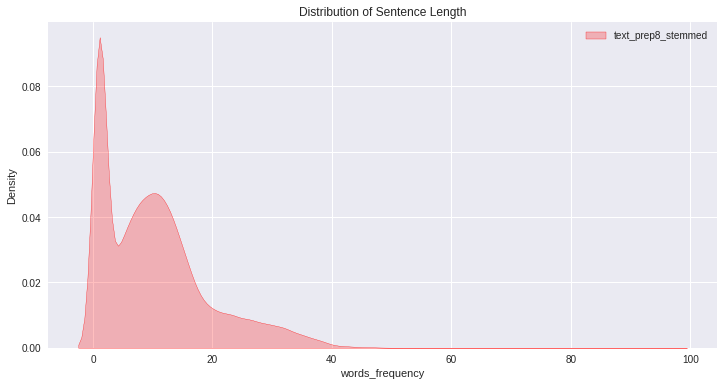

In [28]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentence Length')
p1=sns.kdeplot(df['words_frequency'], shade=True, color="r")
plt.legend(labels=['text_prep8_stemmed'])

plt.show()

- this is the distribution of data that has been cleaned
- the words length for each data is varied from 1 to 100 words
- we see that the most data is in the range of 1 to 15 words

## 2.B) Distribution of Sentiment

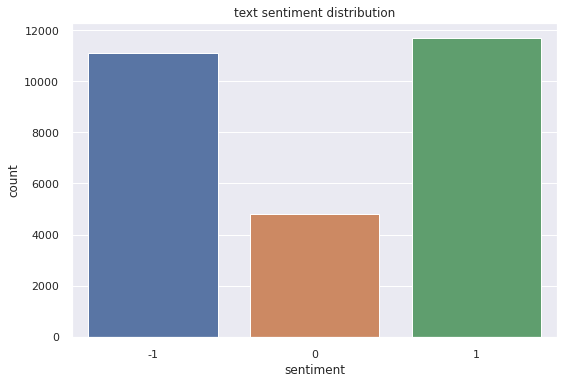

sentiment  text_prep8_stemmed  percentage
2          1               11636       42.38
0         -1               11030       40.28
1          0                4789       17.34

total data  :  27617


In [29]:
# barchart
sns.set(style='darkgrid')

sns.countplot(x=df.sentiment)
plt.title('text sentiment distribution')

plt.tight_layout()
plt.show()

# dataframe
temp = df.groupby('sentiment').count()['text_prep8_stemmed'].reset_index().sort_values(by='text_prep8_stemmed', ascending=False)
temp['percentage'] = list(round(df.sentiment.value_counts(normalize=True) * 100, 2))
display(temp)
print('total data  : ', len(df))

- the data of `sentiment` is quite imbalanced, where `neutral sentiment` is lesser than others.
- there should be treatment in the model development

## 2.C) Distribution of Sentiment by Words Frequency

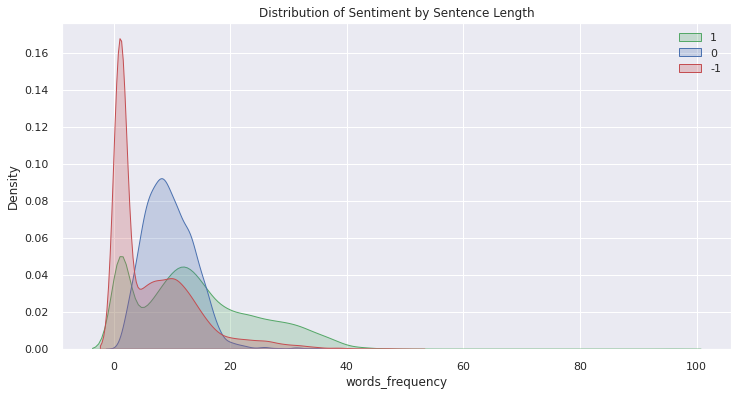

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentiment by Sentence Length')

p1=sns.kdeplot(df[df['sentiment']== 1]['words_frequency'], shade=True, color="g")
p1=sns.kdeplot(df[df['sentiment']== 0]['words_frequency'], shade=True, color="b")
p1=sns.kdeplot(df[df['sentiment']== -1]['words_frequency'], shade=True, color="r")


plt.legend(labels=[1, 0, -1])

plt.show()

- good sentiment data is quite distributed in the range of 1 to 40
- neutral sentiment data is normally distributed in the range of 1 to 20
- bad sentiment data is mostly distributed in the range of 1 to 5

## 2.D) Word Frequency

In [31]:
def vocab(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    vocabulary = {'word': check.index, 'freq': check.values}
    vocabulary = pd.DataFrame(vocabulary)
    vocabulary.index = vocabulary['word']
    vocabulary.drop('word', axis=1, inplace=True)
    vocabulary.sort_values('freq', ascending=False, inplace=True)
    
    return vocabulary

>##### good sentiment (1)

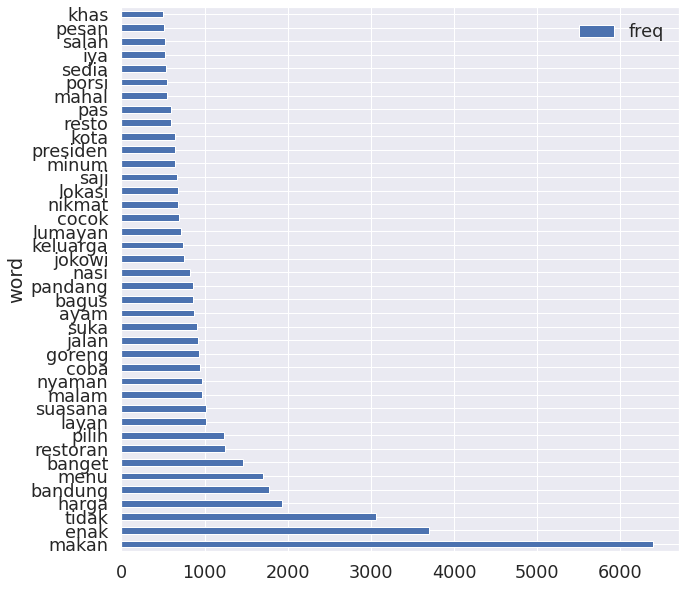

In [67]:
vocabulary_cleaned = vocab(df[df['sentiment'] == 1]['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

- top words for good sentiment are makan, enak harga, bandung, restoran, pilih, layan. It can be assumed that they talk about restaurant review.
- surprisingly, the word `tidak` also becomes one of top words for good sentiment. It indicates that `negation` doesnt absolutely means `negative` or `bad`. The negation can be assumed to negate something bad which in turn change the meaning into positive/neutral sentiment ('tidak jelek' or 'tidak apa-apa')

>##### bad sentiment

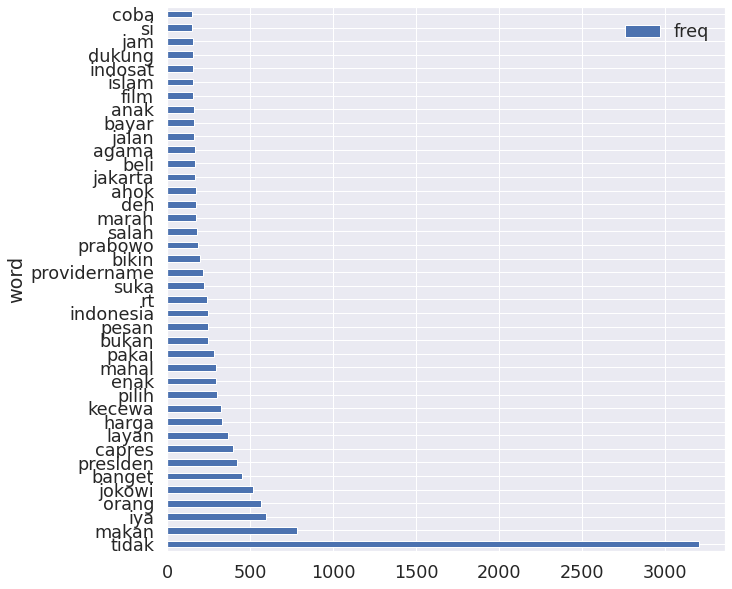

In [33]:
vocabulary_cleaned = vocab(df[df['sentiment'] == -1]['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

- we found that `tidak` becomes the top words in bad sentiment. However the frequency is lesser than those in good sentiment.
- the other top words are makan, iya, jokowi, banget and presiden.

>##### neutral sentiment (0)

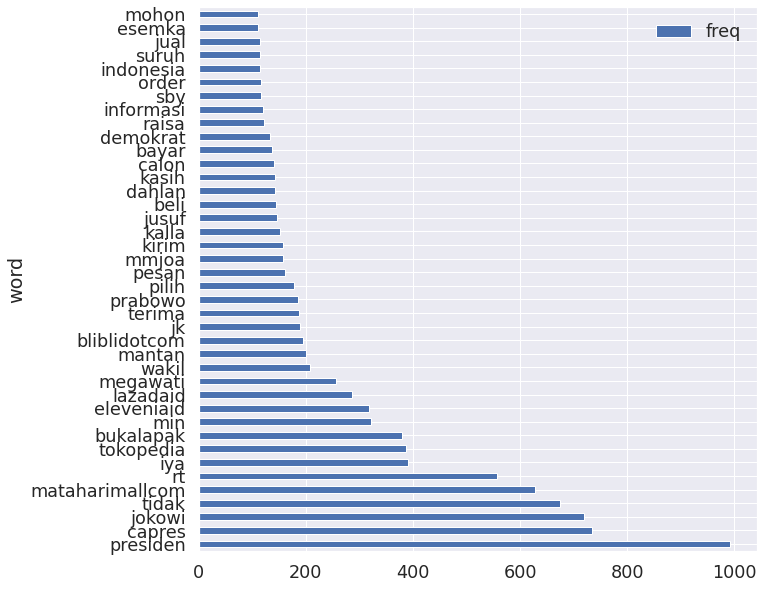

In [34]:
vocabulary_cleaned = vocab(df[df['sentiment'] == 0]['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

## 2.E) Word Cloud

In [35]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')

>##### good sentiment

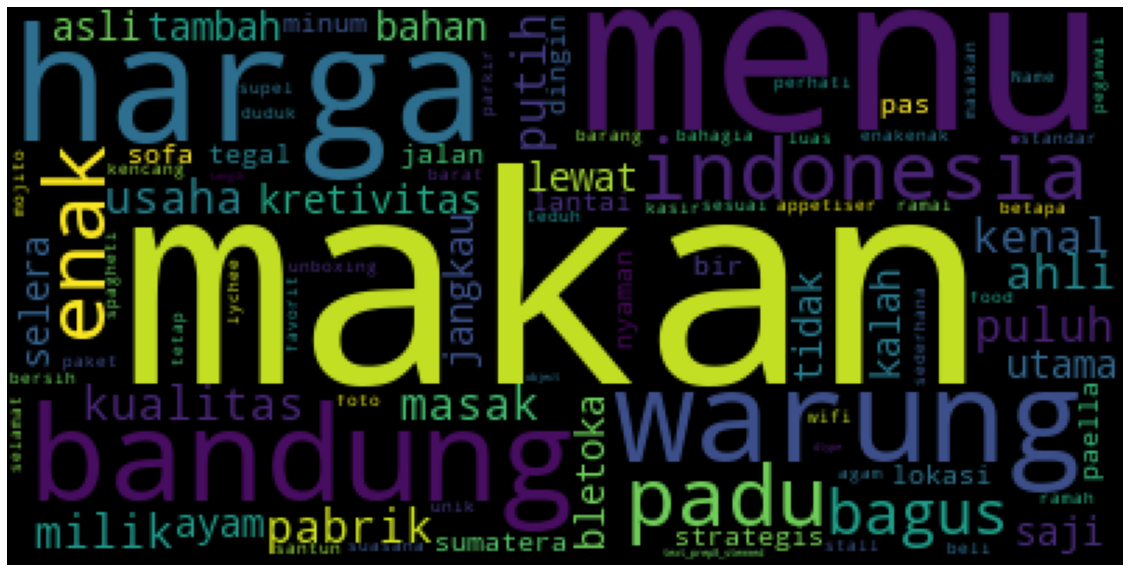

In [36]:
word_cloud = WordCloud().generate(str(df[df['sentiment'] == 1]['text_prep8_stemmed']))
plot_cloud(word_cloud)

>##### bad sentiment

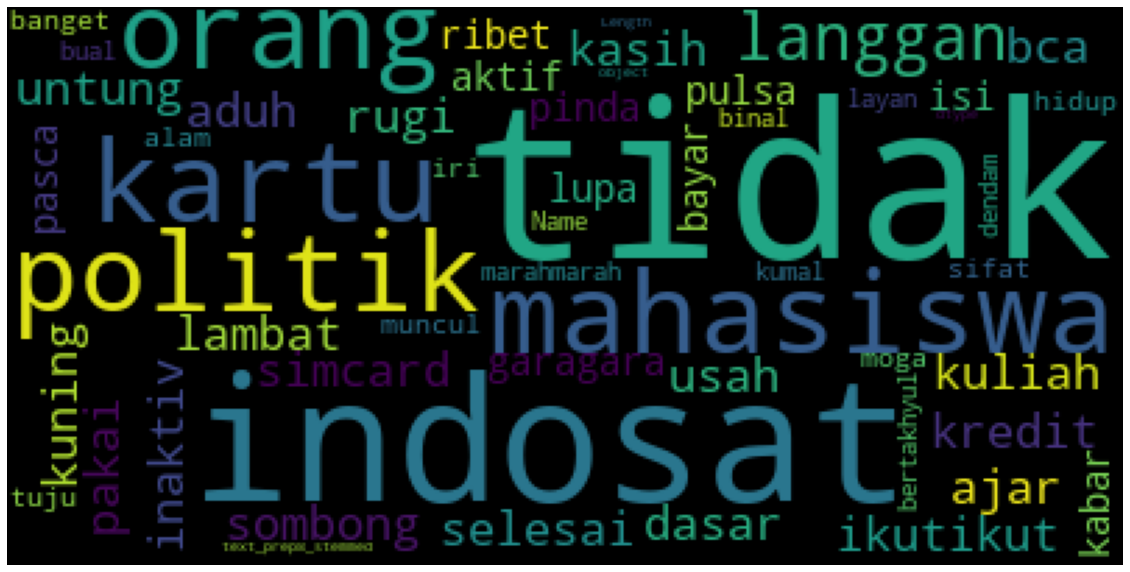

In [37]:
word_cloud = WordCloud().generate(str(df[df['sentiment'] == -1]['text_prep8_stemmed']))
plot_cloud(word_cloud)

>##### neutral sentiment

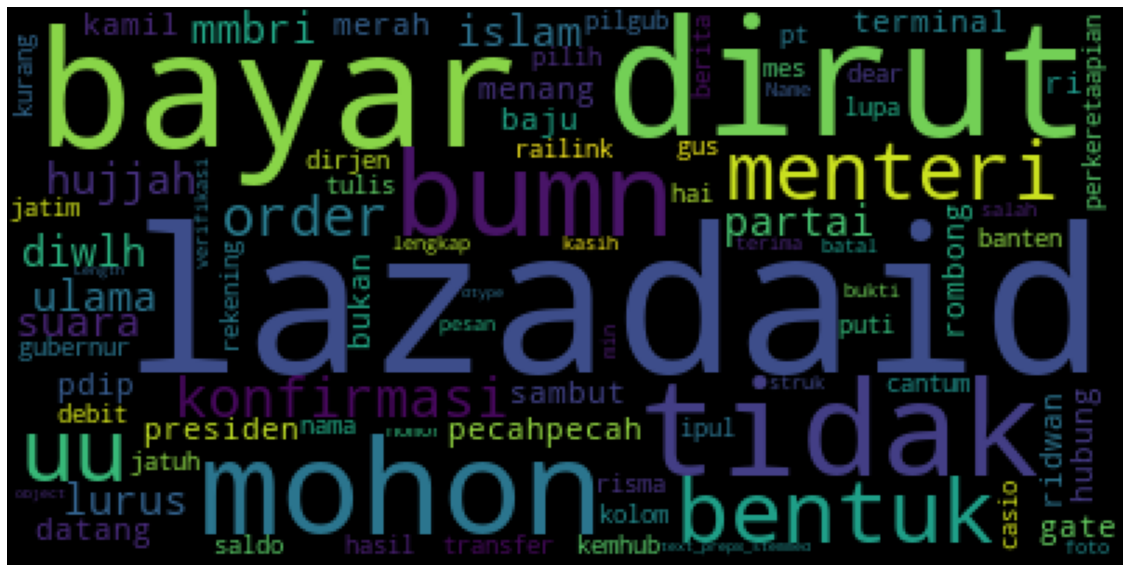

In [38]:
word_cloud = WordCloud().generate(str(df[df['sentiment'] == 0]['text_prep8_stemmed']))
plot_cloud(word_cloud)

# PART 3: TRAIN TEST SPLIT

In [80]:
text = df['text']
y = df['sentiment']

text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.3, stratify=y, random_state=2020)
print('total data: ', len(df))

text_train.shape, text_test.shape, y_train.shape, y_test.shape

total data:  27617


((19331,), (8286,), (19331,), (8286,))

In [40]:
print('Proportion of Target Label in train and test data')
pd.DataFrame({'y_train': y_train.value_counts(normalize=True), 'y_test': y_test.value_counts(normalize=True)})

Proportion of Target Label in train and test data


y_train    y_test
 1  0.423827  0.423847
-1  0.402773  0.402727
 0  0.173400  0.173425

there is imbalance data for neutral data, this will be treated specially later in the modelling

# PART 4: TEXT PREPROCESSING - Pipeline Purpose

## 4.1) Special Characters/Words Dictionary

In [41]:
# the element on the dictionary has been curated as follows:
# - taking out the negation in stopwords, such as "tidak", "bukan", "belum", "jangan", and their variations
# - slang words sudah ditambahkan

# stopwords
STOPWORDS = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'yg', 'jd', 'nya', 'sih', 'url']

# emoji converter
emoji_dictionary = {'üòõ': 'Face_With_Stuck-Out_Tongue', 'üò†': 'Angry_Face', 'üí£': 'Bomb', 'üíî': 'Broken_Heart', 'üòï': 'Confused_Face', 'üòû': 'Disappointed_Face', 'üòë': 'Expressionless_Face', 'üòã': 'Face_Savouring_Delicious_Food', 'üò±': 'Face_Screaming_in_Fear', 'üòì': 'Face_With_Cold_Sweat', 'üòÆ': 'Face_With_Open_Mouth', 'üò§': 'Face_With_Steam_From_Nose', 'üòù': 'Face_With_Stuck-Out_Tongue_&_Closed_Eyes', 'üò∂': 'Face_Without_Mouth', 'üî•': 'Fire', '‚òπ': 'Frowning_Face', 'üò¨': 'Grimacing_Face', '‚ö°': 'High_Voltage', 'ü§•': 'Lying_Face', 'üò£': 'Persevering_Face', 'üôá': 'Person_Bowing', 'üèÉ': 'Person_Running', 'üêΩ': 'Pig_Nose', 'üò°': 'Pouting_Face', 'üôà': 'See-No-Evil_Monkey', 'üôÅ': 'Slightly_Frowning_Face', 'üôä': 'Speak-No-Evil_Monkey', 'ü§î': 'Thinking_Face', 'üëé': 'Thumbs_Down', 'üëÖ': 'Tongue', 'üò©': 'Weary_Face', 'ü§ê': 'Zipper-Mouth_Face', 'üòê': 'Neutral_Face', 'üôÑ': 'Face_With_Rolling_Eyes', 'üòè': 'Smirking_Face', 'üò•': 'Disappointed_but_Relieved_Face', 'üòØ': 'Hushed_Face', 'üò™': 'Sleepy_Face', 'üò´': 'Tired_Face', 'üò¥': 'Sleeping_Face', 'üòå': 'Relieved_Face', 'üòú': 'Face_With_Stuck-Out_Tongue_&_Winking_EyeNegatif', 'ü§§': 'Drooling_Face', 'üòí': 'Unamused_Face', 'üòî': 'Pensive_Face', 'üôÉ': 'Upside-Down_Face', 'ü§ë': 'Money-Mouth_Face', 'üò≤': 'Astonished_Face', 'üòñ': 'Confounded_Face', 'üòü': 'Worried_Face', 'üò¢': 'Crying_Face', 'üò≠': 'Loudly_Crying_Face', 'üò¶': 'Frowning_Face_With_Open_Mouth', 'üòß': 'Anguished_Face', 'üò®': 'Fearful_Face', 'üò∞': 'Face_With_Open_Mouth_&_Cold_Sweat', 'üò≥': 'Flushed_Face', 'üòµ': 'Dizzy_Face', 'üò∑': 'Face_With_Medical_Mask', 'ü§í': 'Face_With_Thermometer', 'ü§ï': 'Face_With_Head-Bandage', 'ü§¢': 'Nauseated_Face', 'ü§ß': 'Sneezing_Face', 'ü§ì': 'Nerd_Face', 'üòà': 'Smiling_Face_With_Horns', 'üëø': 'Angry_Face_With_Horns', 'üëπ': 'Ogre', 'üë∫': 'Goblin', 'üíÄ': 'Skull', '‚ò†': 'Skull_and_Crossbones', 'üëª': 'Ghost', 'üí©': 'Pile_of_Poo', 'üôÄ': 'Weary_Cat_Face', 'üòø': 'Crying_Cat_Face', 'üòæ': 'Pouting_Cat_Face', 'üôâ': 'Hear-No-Evil_Monkey', 'üôé': 'Person_Pouting', 'üôÖ': 'Person_Gesturing_No', 'üíÅ': 'Person_Tipping_Hand', 'ü§¶': 'Person_Facepalming', 'ü§∑': 'Person_Shrugging', 'ü§û': 'Crossed_Fingers', 'üìâ': 'Chart_Decreasing', '‚õî': 'No_Entry', '‚úñ': 'Heavy_Multiplication_X', '‚ùå': 'Cross_Mark', '‚ùé': 'Cross_Mark_Button', 'üëå': 'OK_Hand', 'üëä': 'Oncoming_Fist', 'ü§ò': 'Sign_of_the_Horns', 'üòç': 'Smiling_Face_With_Heart-Eyes', 'üòä': 'Smiling_Face_With_Smiling_Eyes', 'üëç': 'Thumbs_Up', 'üòπ': 'Cat_Face_With_Tears_of_Joy', 'üëè': 'Clapping_Hands', 'üòò': 'Face_Blowing_a_Kiss', 'üòÇ': 'face_with_tears_of_joy', 'üôè': 'Folded_Hands', '‚úä': 'Glory', 'üåü': 'Glowing_Star', 'üòÅ': 'grining_face_with_smile_eye', 'üòÄ': 'grining_face', 'üíò': 'Heart_With_Arrow', '‚úî': 'Heavy_Check_Mark', 'ü§ó': 'Hugging_Face', 'üòö': 'Kissing_Face_With_Closed_Eyes', '‚ù§': 'lovered', 'üôã': 'Person_Raising_Hand', 'üôå': 'Raising_Hands', 'ü§£': 'Rolling_on_the_Floor_Laughing', 'üòÜ': 'Smiling_Face_With_Open_Mouth_&_Closed_Eyes', 'üòÖ': 'Smiling_Face_With_Open_Mouth_&_Cold_Sweat', 'üòÑ': 'Smiling_Face_With_Open_Mouth_&_Smiling_Eyes', 'üòé': 'Smiling_Face_With_Sunglasses', 'üèÜ': 'Trophy', '‚úå': 'Victory_Hand', 'üòÉ': 'Smiling_Face_With_Open_Mouth', 'üòâ': 'Wingking_Face', 'üòó': 'Kissing_Face', 'üòô': 'Kissing_Face_With_Smiling_Eyes', '‚ò∫': 'Smiling_Face', 'üôÇ': 'Slightly_Smiling_Face', 'üòá': 'Smiling_Face_With_Halo', 'ü§†': 'Cowboy_Hat_Face', 'ü§°': 'Clown_Face', 'üò∫': 'Smiling_Cat_Face_With_Open_Mouth', 'üò∏': 'Grinning_Cat_Face_With_Smiling_Eyes', 'üòª': 'Smiling_Cat_Face_With_Heart-Eyes', 'üòº': 'Cat_Face_With_Wry_Smile', 'üòΩ': 'Kissing_Cat_Face_With_Closed_Eyes', '‚úà': 'Plane', 'üëº': 'Baby_Angel', 'üíÜ': 'Person_Getting_Massage', 'üö∂': 'Person_Walking', 'üíÉ': 'Woman_Dancing', 'üë≠': 'Two_Women_Holding_Hands', 'üíè': 'Kiss', 'üíë': 'Couple_With_Heart', 'üí™': 'Flexed_Biceps', 'üñê': 'Raised_Hand_With_Fingers_Splayed', 'ü§ù': 'Handshake', 'üíã': 'Kiss_Mark', 'üíû': 'Revolving_Hearts', 'üíù': 'Heart_With_Ribbon', 'üíé': 'Gem_Stone', 'üê•': 'Front-Facing_Baby_Chick', 'üíê': 'Bouquet', 'üåπ': 'Rose', 'üåõ': 'First_Quarter_Moon_With_Face', 'üåú': 'Last_Quarter_Moon_With_Face', 'üåù': 'Full_Moon_With_Face', 'üåû': 'Sun_With_Face', '‚≠ê': 'White_Medium_Star', 'üåà': 'Rainbow', 'üéÄ': 'Ribbon', 'üéÅ': 'Wrapped_Gift', 'üí°': 'Light_Bulb', 'üìà': 'Chart_Increasing', 'üíØ': 'Hundred_Points', 'üÜó': 'OK_Button'}

# slang words converter
slang_data = {'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bkn': 'bukan','bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blm': 'belum','blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cm': 'cuma', 'cuman': 'cuma', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'conlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dkt': 'dekat', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'ga':'tidak', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak': 'tidak', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'gaje': 'tidak jelas', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'gitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gmn': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpp': 'tidak apa-apa', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gt': 'begitu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbg': 'sebagai', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin'}

## 4.2) Text Preprocessing Functions
- Step 1
    1. converting to lower case
    1. remove or convert number into text
    1. remove punctuation
    1. remove white spaces
    1. converting slang words to standard words
    1. converting emoji to emoji description
    1. remove stopwords and particular words 
- Step 2
    8. stemming (Indonesian affixation system)

In [42]:
# 1) Converting to Lower Case
def to_lower(text):
    return text.lower()

# 2) remove or convert number into text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# 3) remove punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# 4) remove white spaces
def remove_white_space(text):
    return " ".join(text.split())

# 5) converting slang words to standard words
def slang_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(slang_data.keys()):
            text_split[text_split.index(i)] = slang_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 6) converting emoji to description
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_dictionary.keys()):
            text_split[text_split.index(i)] = emoji_dictionary[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 7) remove stopwords and particular words 
def remove_stopwords(sentence):
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in STOPWORDS])

# 8) stemming text
def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [75]:
# combining all text preprocessing functions
def text_preprocessing_with_stem(text):
    step1 = to_lower(text)
    step2 = remove_numbers(text)
    step3 = remove_punct(text)
    step4 = remove_white_space(text)
    step5 = slang_converter(text)
    step6 = emoji_converter(text)
    step7 = remove_stopwords(text)
    step8 = stem(text)
    
    return step8

def text_preprocessing_wo_stem(text):
    step1 = to_lower(text)
    step2 = remove_numbers(text)
    step3 = remove_punct(text)
    step4 = remove_white_space(text)
    step5 = slang_converter(text)
    step6 = emoji_converter(text)
    step7 = remove_stopwords(text)
    
    return step7

This text preprocessing will be included in the pipeline.

It will be passed to Vectorizer function

## 4.3) Pipeline
- There are three classification algorithms that will be compared.
- Since there are two methods of vectorization, there will be 6 types of algorithms that will be compared
- Based on the comparison, best algorithm will be selected to be continued to hyperparameter tuning in order to create final model that will be deployed to dashboard

>##### 4.3.1) Multinomial Naive Bias - CountVectorizer

In [ ]:
nb = MultinomialNB()

nb_cvt_pipeline = Pipeline([
    ('preprocessor', CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
    ('model', nb)
])

>##### 4.3.2) Multinomial Naive Bias - TfidfVectorizer

In [ ]:
nb = MultinomialNB()
nb_tfidf_pipeline = Pipeline([
  ('preprocessor', TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', nb)
])

>##### 4.3.3) Logistic Regression - CountVectorizer

In [ ]:
logreg = LogisticRegression(class_weight='balanced', solver='lbfgs')
logreg_cvt_pipeline = Pipeline([
  ('preprocessor', CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', logreg)
])

>##### 4.3.4) Logistic Regression - TfidfVectorizer

In [ ]:
logreg = LogisticRegression(class_weight='balanced', solver='lbfgs')
logreg_tfidf_pipeline = Pipeline([
    ('preprocess', TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
    ('model', logreg)
])

>##### 4.3.5) Decision Tree - CountVectorizer

In [ ]:
dtc = DecisionTreeClassifier()
dtc_cvt_pipeline = Pipeline([
  ('preprocess', CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', dtc)
])

>##### 4.3.6) Decision Tree - TfidfVectorizer

In [ ]:
dtc = DecisionTreeClassifier()
dtc_tfidf_pipeline = Pipeline([
  ('preprocess', TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))),
  ('model', dtc)
])

# PART 5: MODELLING - BENCHMARKING WITH CROSSVALIDATION.

## 5.1) Initial Model

>##### Fitting Initial Model

In [ ]:
# Multinomial Naive Bias
nb_cvt_pipeline.fit(text_train, y_train)
nb_tfidf_pipeline.fit(text_train, y_train)

# Logistic Regression
logreg_cvt_pipeline.fit(text_train, y_train)
logreg_tfidf_pipeline.fit(text_train, y_train)

# Decision Tree
dtc_cvt_pipeline.fit(text_train, y_train)
dtc_tfidf_pipeline.fit(text_train, y_train)

print('fitting pipeline completed')

>##### Initial Model Evaluation

In [ ]:
# Multinomial Naive Bias
print("Multinomial Naive Bias - CountVectorizer")
y_pred_nb_cvt = nb_cvt_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_nb_cvt))

print("Multinomial Naive Bias - TfidfVectorizer")
y_pred_nb_tfidf = nb_tfidf_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_nb_tfidf))


# Logistic Regression
print("Logistic Regression - CountVectorizer")
y_pred_logreg_cvt = logreg_cvt_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_logreg_cvt))

print("Logistic Regression - TfidfVectorizer")
y_pred_logreg_tfidf = logreg_tfidf_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_logreg_tfidf))


# Decision Tree
print("Decision Tree - CountVectorizer")
y_pred_dtc_cvt = dtc_cvt_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_dtc_cvt))

print("Decision Tree - TfidfVectorizer")
y_pred_dtc_tfidf = dtc_tfidf_pipeline.predict(text_test)
print(classification_report(y_test, y_pred_dtc_tfidf))


Multinomial Naive Bias - CountVectorizer
              precision    recall  f1-score   support

          -1       0.73      0.53      0.61      3337
           0       0.65      0.77      0.71      1437
           1       0.64      0.76      0.70      3512

    accuracy                           0.67      8286
   macro avg       0.67      0.69      0.67      8286
weighted avg       0.68      0.67      0.66      8286

Multinomial Naive Bias - TfidfVectorizer
              precision    recall  f1-score   support

          -1       0.78      0.47      0.59      3337
           0       0.83      0.52      0.64      1437
           1       0.59      0.91      0.72      3512

    accuracy                           0.66      8286
   macro avg       0.73      0.63      0.65      8286
weighted avg       0.71      0.66      0.65      8286

Logistic Regression - CountVectorizer
              precision    recall  f1-score   support

          -1       0.75      0.88      0.81      3337
         

## 5.2) Cross Validation Score
- the cross validation scoring will be done to compare the initial performance of all model
- this scoring will be based on `recall_micro`, by taking consideration as follows
  - this is multiclass classification and recall_micro can facilitate the multiclass classification and also imbalance data.
  - the focus of classification is to predict the class `-1` or `bad sentiment`
  - the classification model tries to minimize the bad sentiment to be predicted as positive or negative sentiment (minimizing `False Negative`).
  - if there are too many bad sentiments are predicted as not-bad sentiment, the related team will potentially fail to anticipate any negative occurence and also not ready to prepare the mitigation plan
  - therefore recall_micro will be used

In [ ]:
skfold = StratifiedKFold(n_splits=5)

# Multinomial Naive Bias
nb_cvt_pipeline_cv = cross_val_score(nb_cvt_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )
nb_tfidf_pipeline_cv = cross_val_score(nb_tfidf_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )

# Logistic Regression
logreg_cvt_pipeline_cv = cross_val_score(logreg_cvt_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )
logreg_tfidf_pipeline_cv = cross_val_score(logreg_tfidf_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )

# Decision Tree
dtc_cvt_pipeline_cv = cross_val_score(dtc_cvt_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )
dtc_tfidf_pipeline_cv = cross_val_score(dtc_tfidf_pipeline, text_train, y_train, cv=skfold, scoring='recall_micro', )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


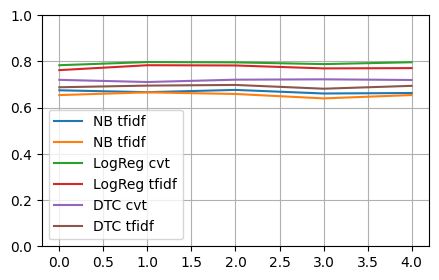

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5,3))

plt.plot(range(len(nb_cvt_pipeline_cv)), nb_cvt_pipeline_cv, label='NB tfidf')
plt.plot(range(len(nb_tfidf_pipeline_cv)), nb_tfidf_pipeline_cv, label='NB tfidf')
plt.plot(range(len(logreg_cvt_pipeline_cv)), logreg_cvt_pipeline_cv, label='LogReg cvt')
plt.plot(range(len(logreg_tfidf_pipeline_cv)), logreg_tfidf_pipeline_cv, label='LogReg tfidf')
plt.plot(range(len(dtc_cvt_pipeline_cv)), dtc_cvt_pipeline_cv, label='DTC cvt')
plt.plot(range(len(dtc_tfidf_pipeline_cv)), dtc_tfidf_pipeline_cv, label='DTC tfidf')


plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [ ]:
pd.DataFrame({'CV NB cvt': nb_cvt_pipeline_cv, 
              'CV NB tfidf': nb_tfidf_pipeline_cv,
              'CV LogReg cvt': logreg_cvt_pipeline_cv, 
              'CV LogReg tfidf': logreg_tfidf_pipeline_cv,
              'CV DTC cvt': dtc_cvt_pipeline_cv, 
              'CV DTC tfidf': dtc_tfidf_pipeline_cv}
             ).T

0         1         2         3         4
CV NB cvt        0.675200  0.667098  0.676927  0.661407  0.663476
CV NB tfidf      0.654513  0.666322  0.659338  0.640197  0.654682
CV LogReg cvt    0.783812  0.797465  0.796172  0.788670  0.796689
CV LogReg tfidf  0.762607  0.783756  0.782721  0.770047  0.771340
CV DTC cvt       0.720455  0.711071  0.721159  0.722711  0.719865
CV DTC tfidf     0.688389  0.695551  0.698396  0.682100  0.694516

- Based on the score above, Logistic Regression is superior than others with CV Score for both Vectorizer almost reach 0.8.
- `CV LogReg cvt` is in the range of 78-79 and `CV LogReg tfidf` is in the range of 76-78`
- I will use **Logistic Regression** as the model that will be processed to Hyperparameter Tuning
- Although, Logistic Regression with CountVectorizer is a bit higher than with TfidfVectorizer, I prefer to use Logistic Regression with TF-IDF since its encoding method considers the importance of meaningfull words in a context.

# PART 6: MODELLING - HYPERPARAMETER TUNING.

##### training all data

In [ ]:
# text preprocessor
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing_with_stem, tokenizer=word_tokenize, ngram_range=(1, 2))

# model
logreg = LogisticRegression(solver='lbfgs')

# pipeline
sentiment_analyser_pipe_tfidf = Pipeline([
    ('preprocess', tf_idf_prep),
    ('logreg', logreg)
])

# crossvalidation
skfold = StratifiedKFold(n_splits=5)

# hyperparameter tuning
hyperparam_space_logreg = {
    'logreg__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'logreg__max_iter':[100, 200, 300, 400, 500, 1000], # bench mark max_iter = 100
}

# grid_search_logreg_hyper = GridSearchCV(
#     sentiment_analyser_pipe_tfidf,
#     param_grid = hyperparam_space_logreg,
#     cv = skfold,
#     scoring = 'recall_micro',
#     verbose = 1,
#     n_jobs = -1
# )

rand_search_logreg_hyper = RandomizedSearchCV(
    sentiment_analyser_pipe_tfidf,
    hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

In [ ]:
# grid_search_logreg_hyper.fit(text_train, y_train)
rand_search_logreg_hyper.fit(text_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 1133.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 1349.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocess',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                           

In [ ]:
print('estimator logreg tuned score:', rand_search_logreg_hyper.best_score_)
print('estimator logreg best params:', rand_search_logreg_hyper.best_params_)

estimator logreg tuned score: 0.8293780764951506
estimator logreg best params: {'logreg__max_iter': 300, 'logreg__C': 10}


              precision    recall  f1-score   support

          -1       0.84      0.85      0.84      3309
           0       0.79      0.80      0.80      1437
           1       0.85      0.84      0.85      3491

    accuracy                           0.84      8237
   macro avg       0.83      0.83      0.83      8237
weighted avg       0.84      0.84      0.84      8237



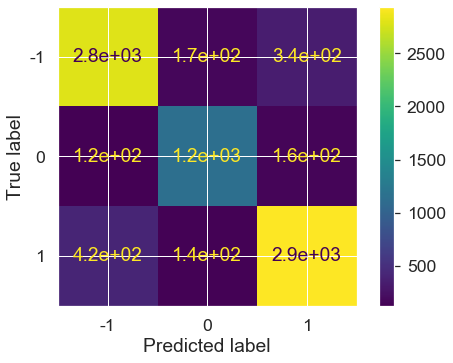

In [ ]:
y_pred_logreg_hyper = rand_search_logreg_hyper.predict(text_test)
print(classification_report(y_test, y_pred_logreg_hyper))
plot_confusion_matrix(rand_search_logreg_hyper, text_test, y_test);

# PART 7: PREDICTION

In [76]:
directory_model = '/content/drive/My Drive/Colab Notebooks/COURSE - PURWADHIKA - Data Science & Machine Learning/Modul_4_Final_Project/Model/'

In [77]:
model = joblib.load(directory_model + 'logit_hyper_rand.joblib')
model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.22 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocess',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                           

In [78]:
print('estimator logreg tuned score:', model.best_score_)
print('estimator logreg best params:', model.best_params_)

estimator logreg tuned score: 0.8293780764951506
estimator logreg best params: {'logreg__max_iter': 300, 'logreg__C': 10}


In [ ]:
y_pred_model = model.predict(text_test)
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(model, text_test, y_test);